In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [11]:
de_novo = pd.read_csv("~/qbb2020-answers/day5-lunch/aau1043_dnm.tsv")
ages = pd.read_csv("~/qbb2020-answers/day5-lunch/aau1043_parental_age.tsv")
de_novo

,Chr,Pos,Ref,Alt,Proband_id,Phase_combined,Crossover,Sanger
0,chr1,241097646,C,T,99379,father,paternal_crossover,confirmed
1,chr10,29202943,A,G,8147,father,maternal_crossover,PCR failed
2,chr11,129441657,C,T,5410,mother,maternal_crossover,confirmed
3,chr13,96867147,A,G,46025,father,paternal_crossover,confirmed
4,chr17,50609998,C,T,144769,mother,maternal_crossover,confirmed
...,...,...,...,...,...,...,...,...
26426,chr9,137374330,C,T,54383,father,NaN,NaN
26427,chr9,137396508,C,T,39729,father,NaN,NaN
26428,chr9,137633973,C,A,17904,mother,NaN,NaN
26429,chr9,137889777,G,A,80108,father,NaN,NaN


In [72]:
# Count the number of de novo mutations per proband
total = de_novo["Proband_id"].value_counts().rename_axis('Proband_id').reset_index(name = 'Total_dnm')
pat_dnm = de_novo["Proband_id"][de_novo["Phase_combined"] == 'father'].value_counts().rename_axis('Proband_id').reset_index(name = 'Pat_dnm')
mat_dnm = de_novo["Proband_id"][de_novo["Phase_combined"] == 'mother'].value_counts().rename_axis('Proband_id').reset_index(name = 'Mat_dnm')
de_novo_df = pat_dnm.merge(mat_dnm.merge(total, on="Proband_id"), on = 'Proband_id')

In [77]:
# Use the pandas merge function to combine the above data frame with the data frame with maternal and paternal ages
dnm_ages = de_novo_df.merge(ages, on = 'Proband_id')

In [78]:
dnm_ages

,Proband_id,Pat_dnm,Mat_dnm,Total,Father_age,Mother_age
0,91410,111,10,122,51,34
1,114094,98,22,121,51,44
2,111288,93,21,115,53,44
3,99984,91,12,103,51,41
4,64166,88,16,105,41,40
...,...,...,...,...,...,...
391,76504,27,5,34,19,17
392,1097,26,12,39,19,19
393,13990,25,7,33,16,17
394,36430,25,16,42,35,26


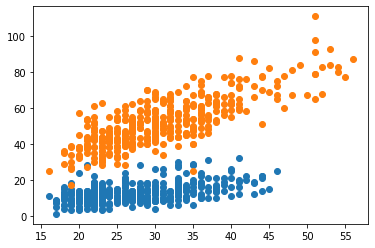

In [91]:
fig, ax = plt.subplots()

ax.scatter(dnm_ages["Mother_age"], dnm_ages["Mat_dnm"])
ax.scatter(dnm_ages["Father_age"], dnm_ages["Pat_dnm"])

plt.show()

In [108]:
# Use ordinary least squares smf.ols() to test for an association between maternal age and maternally inherited de novo mutations.
mat_model = smf.ols(formula = "Mat_dnm ~ 1 + Mother_age", data = dnm_ages)
mat_results = mat_model.fit()
mat_results = mat_results.summary()

pat_model = smf.ols(formula = "Pat_dnm ~ 1 + Father_age", data = dnm_ages)
pat_results = pat_model.fit()
pat_results = pat_results.summary()


In [109]:
mat_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Mat_dnm   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     116.0
Date:                Fri, 04 Sep 2020   Prob (F-statistic):           6.88e-24
Time:                        14:20:00   Log-Likelihood:                -1158.1
No. Observations:                 396   AIC:                             2320.
Df Residuals:                     394   BIC:                             2328.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5040      0.981      2.553      0.011       0.576       4.432
Mother_age     0.3776      0.035     10.772      0.000       0.309       0.446
==============================================================================
Omnibus:                       51.143   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.501
Skew:                           0.845   Prob(JB):                     4.03e-17
Kurtosis:                       4.310   Cond. No.                         121.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
pat_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Pat_dnm   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     639.6
Date:                Fri, 04 Sep 2020   Prob (F-statistic):           1.55e-84
Time:                        14:20:00   Log-Likelihood:                -1406.6
No. Observations:                 396   AIC:                             2817.
Df Residuals:                     394   BIC:                             2825.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3263      1.702      6.066      0.000       6.979      13.673
Father_age     1.3538      0.054     25.291      0.000       1.249       1.459
==============================================================================
Omnibus:                        7.687   Durbin-Watson:                   1.183
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                8.185
Skew:                           0.256   Prob(JB):                       0.0167
Kurtosis:                       3.483   Cond. No.                         127.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# BOTH Maternal and Paternal Ages are good inidicators of how many de novo mutations there are.

# The coefficient is the size of the relationship - Father_age	1.3538. Mother_age	0.3776

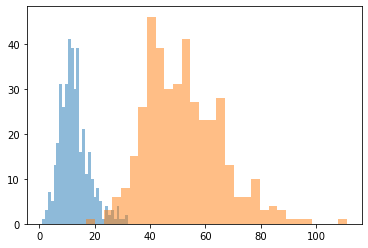

In [111]:
# Plot a histogram of the number of maternal de novo mutations and paternal de novo mutations per proband on a single plot with semi-transparency.

fig, ax = plt.subplots()
ax.hist(dnm_ages["Mat_dnm"], bins = 30, alpha = 0.5)
ax.hist(dnm_ages["Pat_dnm"], bins = 30, alpha = 0.5)

plt.show()
# Possibly used wrong dataset to run test?

In [112]:
# Test whether the number of maternally inherited de novo mutations per proband is significantly different than the number of paternally inherited de novo mutations per proband.
stats.ttest_ind(dnm_ages["Mat_dnm"],dnm_ages["Pat_dnm"])
# The maternal and paternal de novo mutation counts are significantly different. Reject null. 
# Possibly used wrong dataset to run test?

Ttest_indResult(statistic=-53.403565287269245, pvalue=2.1986031793078793e-264)

In [115]:
# When we want to work with response variables that are "counts", use poisson
# use smf.poisson(formula - )
mat_model = smf.poisson(formula = "Mat_dnm ~ 1 + Mother_age", data = dnm_ages)
mat_poisson = mat_model.fit()
mat_poisson = mat_poisson.summary()

pat_model = smf.poisson(formula = "Pat_dnm ~ 1 + Father_age", data = dnm_ages)
pat_poisson = pat_model.fit()
pat_poisson = pat_poisson.summary()

Optimization terminated successfully.
         Current function value: 2.927974
         Iterations 5
Optimization terminated successfully.
         Current function value: 3.578620
         Iterations 5


In [116]:
mat_poisson

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                Mat_dnm   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Sep 2020   Pseudo R-squ.:                 0.07164
Time:                        14:43:06   Log-Likelihood:                -1159.5
converged:                       True   LL-Null:                       -1248.9
Covariance Type:            nonrobust   LLR p-value:                 8.241e-41
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7671      0.060     29.235      0.000       1.649       1.886
Mother_age     0.0281      0.002     13.582      0.000       0.024       0.032
==============================================================================
"""

In [117]:
pat_poisson

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                Pat_dnm   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Sep 2020   Pseudo R-squ.:                  0.2277
Time:                        14:43:06   Log-Likelihood:                -1417.1
converged:                       True   LL-Null:                       -1834.9
Covariance Type:            nonrobust   LLR p-value:                1.004e-183
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1903      0.027    116.856      0.000       3.137       3.244
Father_age     0.0241      0.001     29.608      0.000       0.023       0.026
==============================================================================
"""

In [136]:
# Using the relevant Poisson regression model that you fit, 
#predict the number of paternal de novo mutations for a proband with 
#a father who was 50.5 years old at the proband's time of birth.

new_obs = pd.DataFrame({"Proband_id":'NewPerson', "Father_age":50.5}, index = ['New ID'])
new_obs
pat_model.fit().predict(new_obs)



Optimization terminated successfully.
         Current function value: 3.578620
         Iterations 5


New ID    82.031316
dtype: float64